# Notebook 2: Clustering

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans


In [18]:
df_feat_red = pd.read_csv('df_feat_red.csv')

In [19]:
df_feat_red.head()

,apartment_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_noon,mean_evening
0,00024dcb907dc1671ef48af550271427,26.050232,17.786085,0.0,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.016660,0.000000,0.000000,5.309107e-04,0.985548,1.160413,0.896031
1,00048208e97e07b7b183718826929def,25.465895,17.790932,0.0,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.017772,0.000493,0.000071,1.419091e-03,0.770462,0.909144,1.063340
2,00048321bf465caba119f73d57093299,33.533112,28.146663,0.0,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.034343,0.000000,0.000506,8.415804e-03,0.914291,2.430788,2.432358
3,00075003b82a8cf375c274560aa6bc9c,27.666442,19.688055,0.0,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.019612,0.000000,0.000000,1.808636e-04,0.702243,1.186189,1.273586
4,000916099693de3f997973f552fdff07,21.522038,15.213498,0.0,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.008013,0.000000,0.000000,9.432771e-07,0.779696,0.884649,0.274397


We lack a predefined target variable, so supervised machine learning techniques are not applicable. Instead, we will use unsupervised machine learning to uncover patterns within the data. Clustering, an unsupervised technique, helps group similar data points based on their characteristics. This will enable us to identify distinct segments within the data, providing valuable insights for further analysis.

In [20]:
# selecting our X

X = df_feat_red.drop(columns=['apartment_id']).to_numpy()

# data need to be scaled before modeling

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### K-Means

We chose K-Means for clustering due to its simplicity, efficiency, and effectiveness in grouping data points into distinct clusters based on their similarities. 

In [21]:
model_kmeans = KMeans(n_clusters=6, n_init=25, random_state=123)
model_kmeans.fit(X=X_scaled)

KMeans(n_clusters=6, n_init=25, random_state=123)

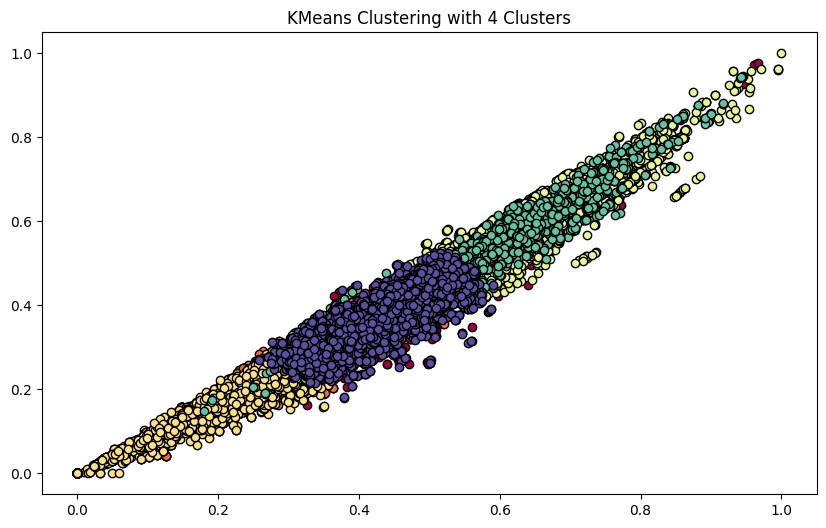

In [22]:
labels = model_kmeans.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering with 4 Clusters')
plt.show()

In [23]:
df_feat_red['cluster'] = labels
cluster_summary = df_feat_red.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_noon,mean_evening
0,0,30.539633,23.615111,1.264302,0.999418,0.016143,0.009920,0.021274,0.000011,0.000548,0.000040,0.052365,0.000169,0.000668,0.002401,2.096176,3.358766,2.089655
1,1,28.870318,22.504457,15.822641,13.525268,0.010662,0.007454,0.020351,0.000003,0.000502,0.000056,0.020308,0.000178,0.000394,0.001661,0.941885,1.419992,0.995696
2,2,14.908368,10.917900,0.980495,0.778244,0.010567,0.006279,0.015486,0.000002,0.000419,0.000010,0.015337,0.000085,0.000275,0.000697,0.729178,1.105890,0.777623
3,3,44.169184,36.093517,1.418735,1.151233,0.014611,0.008976,0.023605,0.000026,0.000411,0.000057,0.022334,0.000116,0.000302,0.003672,1.050726,1.572293,1.082810
4,4,39.091803,31.493181,29.963796,26.716210,0.010557,0.008820,0.024239,0.000035,0.000435,0.000224,0.026456,0.000200,0.000407,0.002626,1.243417,1.807992,1.159952
5,5,29.485484,22.844668,0.704028,0.590579,0.011051,0.008100,0.021240,0.000002,0.000505,0.000021,0.017559,0.000073,0.000288,0.001641,0.845563,1.262754,0.928929


### DBSCAN

We chose to try DBSCAN alongside K-Means because DBSCAN can identify clusters of arbitrary shapes, handle noise and outliers effectively, and cluster based on the density of data points, making it suitable for datasets with varying densities. Additionally, DBSCAN does not require specifying the number of clusters beforehand, which is useful when the optimal number of clusters is unknown.

We look for the best params with gridsearch.

In [ ]:
# grid Search for DBSCAN parameters

eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(20, 50, 5)

best_params = None
best_score = -1
best_model = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        model_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        model_dbscan.fit(X_scaled)
        labels = model_dbscan.labels_


        # ignore models with all points labeled as noise

        if len(set(labels)) <= 1:
            continue


        # silhouette score

        score = silhouette_score(X_scaled, labels)


        # penalize models with too many noise points or very small clusters

        noise_ratio = (labels == -1).sum() / len(labels)
        if noise_ratio < 0.5 and score > best_score:
            best_score = score
            best_params = (eps, min_samples)
            best_model = model_dbscan
            best_labels = labels

print(f"Best parameters: eps = {best_params[0]}, min_samples = {best_params[1]}")
print(f"Best silhouette score: {best_score}")


# plotting the results with the best parameters

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(best_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # black color for noise
        col = [0, 0, 0, 1]

    class_member_mask = (best_labels == k)
    xy = X_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title(f'DBSCAN Clustering with eps={best_params[0]}, min_samples={best_params[1]}')
plt.show()


In [25]:
# using best params from gridsearch for our model

model_dbscan = DBSCAN(eps = 0.9,
                      min_samples = 20)

In [ ]:
model_dbscan.fit(X = X_scaled)
labels = model_dbscan.labels_

In [ ]:
df_feat_red['cluster'] = labels
cluster_summary = df_feat_red.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_noon,mean_evening
0,-1,68.737967,61.941107,20.539426,19.490101,0.048470,0.010695,0.042238,0.000000,0.002534,0.000172,0.200691,8.439457e-07,0.001123,0.011026,6.492165,11.254297,8.311539
1,0,29.876645,23.419772,4.014743,3.455075,0.012186,0.008133,0.020656,0.000009,0.000475,0.000042,0.023404,1.125350e-04,0.000356,0.001968,1.058531,1.613930,1.102646


As we want more than 2 groups, we use another technique to determine the opt epsilon: **k-distance graph**

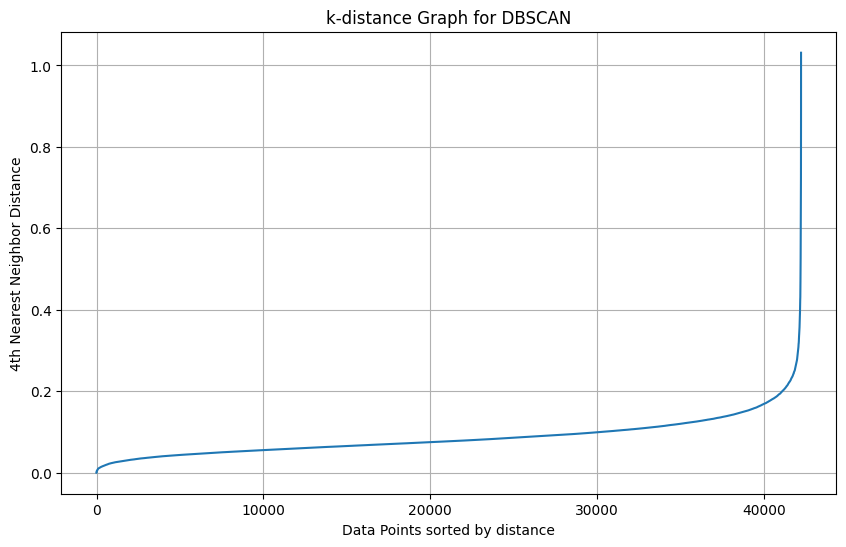

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [ ]:
eps_value = 0.2

model_dbscan = DBSCAN(eps=eps_value, min_samples=20)
model_dbscan.fit(X_scaled)

labels = model_dbscan.labels_

In [ ]:
df_feat_red['cluster'] = labels
cluster_summary = df_feat_red.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_noon,mean_evening
0,-1,36.210628,29.605608,15.178080,13.169915,0.019273,0.012477,0.024897,0.000139,0.001032,0.000492,0.043444,0.001072,0.001334,0.004953,1.954787,2.917337,1.769182
1,0,29.650486,23.198916,3.614873,3.107130,0.011933,0.007977,0.020505,0.000004,0.000455,0.000026,0.022690,0.000078,0.000321,0.001861,1.026528,1.567431,1.078924


## Dropping some more **high** correlated

We decided to drop some highly correlated variables after trying the initial models to improve model performance and interpretability. Highly correlated variables can introduce redundancy, which may lead to overfitting and make the model more complex without adding additional predictive power. 

The following code identifies and removes pairs of variables with a correlation above a specified threshold, ensuring that the remaining features are more independent and thus more likely to contribute meaningfully to the model's predictions.

In [ ]:
def remove_highly_correlated_features(df, correlation_threshold=0.8):

    """
    Remove highly correlated features from a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    correlation_threshold (float): The threshold above which a pair of features is considered highly correlated.

    Returns:
    pd.DataFrame: The DataFrame with highly correlated features removed.
    """

    # selecting only continuous variables

    continuous_vars = df.select_dtypes(include=['float64', 'int64'])


    # calculate correlation matrix

    correlation_matrix = continuous_vars.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    correlation_matrix_masked  = correlation_matrix.mask(mask)


    # find pairs of highly correlated features

    highly_correlated_pairs = set()
    for i in range(len(correlation_matrix_masked.columns)):
        for j in range(i):
            if abs(correlation_matrix_masked.iloc[i, j]) > correlation_threshold:
                colname_i = correlation_matrix_masked.columns[i]
                colname_j = correlation_matrix_masked.columns[j]
                highly_correlated_pairs.add((colname_i, colname_j))


    # create a set to store the columns to remove
    
    columns_to_remove = set()

    for (colname_i, colname_j) in highly_correlated_pairs:
        if colname_i not in columns_to_remove and colname_j not in columns_to_remove:
            # Elegir arbitrariamente uno de los dos para eliminar
            columns_to_remove.add(colname_j)


    # drop the columns to remove from the df

    df_reduced = df.drop(columns=columns_to_remove)


    # heatmap

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix_masked, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation matrix')
    plt.show()

    return df_reduced

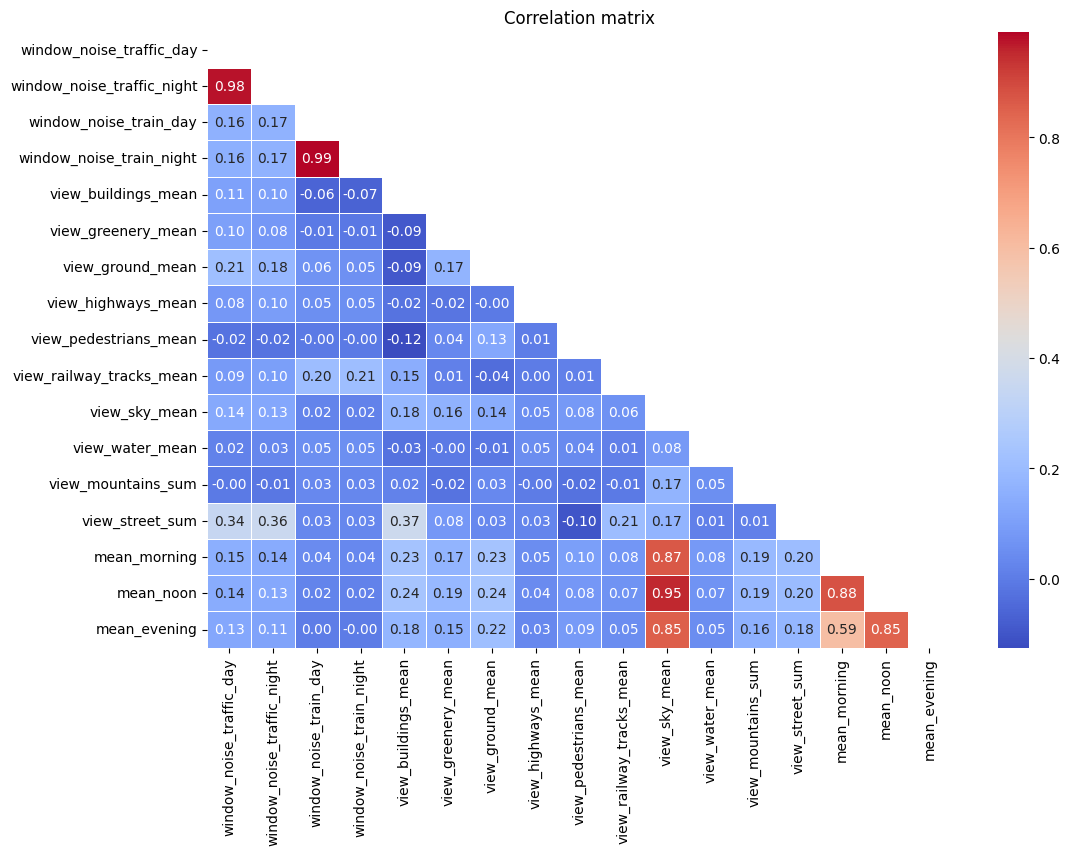

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_evening,cluster
0,00024dcb907dc1671ef48af550271427,17.786085,0.000000,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.000000,0.000000,5.309107e-04,0.896031,5
1,00048208e97e07b7b183718826929def,17.790932,0.000000,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.000493,0.000071,1.419091e-03,1.063340,5
2,00048321bf465caba119f73d57093299,28.146663,0.000000,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.000000,0.000506,8.415804e-03,2.432358,0
3,00075003b82a8cf375c274560aa6bc9c,19.688055,0.000000,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.000000,0.000000,1.808636e-04,1.273586,5
4,000916099693de3f997973f552fdff07,15.213498,0.000000,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.000000,0.000000,9.432771e-07,0.274397,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42202,fff9fc2aabc941723a7f3b6d76ae8df3,22.972132,0.000000,0.002766,0.007345,0.006474,0.0,0.000207,0.000000e+00,0.000000,0.000847,8.676795e-04,0.349165,5
42203,fffc5109a48133188b002f65febd6a93,19.908501,1.557271,0.013616,0.000411,0.019271,0.0,0.000556,1.207677e-06,0.000000,0.000003,4.618265e-03,1.130245,5
42204,fffcd655e54bbf99e71f1dd44d977e4b,26.901521,0.000000,0.003568,0.002068,0.035260,0.0,0.000473,0.000000e+00,0.000000,0.000000,6.653806e-04,1.862567,5
42205,fffdb32c4ecb0b5c7bbfb576cb3c4d40,18.754398,0.000000,0.006614,0.003624,0.003622,0.0,0.000075,0.000000e+00,0.000006,0.000000,5.926681e-04,0.752273,5


In [ ]:
df_clustering = remove_highly_correlated_features(df_feat_red)
df_clustering

In [ ]:
df_clustering.shape

(42207, 14)

In [ ]:
df_clustering.to_csv('/content/drive/MyDrive/FINAL-PROJECT/casas/df_clustering_aftercorr.csv', index=False)

We create our X again with the new features.

In [42]:
X = df_clustering.drop(columns=['apartment_id']).to_numpy()

df_clust_scaled = MinMaxScaler().fit_transform(X)

**Note:**

    After removing highly correlated variables, we re-ran the clustering analysis in the notebook, first using K-Means and then DBSCAN. However, the results from DBSCAN produced very imbalanced clusters, with one cluster containing the majority of the data points while the remaining clusters had very few data points. We tried various approaches and different parameters, but nothing resolved the issue. We even attempted to create clusters from the group containing the majority of data points, but the problem persisted: one large cluster and several small ones.

    As a result, we revisited the distribution of data in the clusters formed by K-Means and found that the data was much more evenly distributed across all groups. Consequently, we decided to keep the clustering results from K-Means with `n_clusters=8`.

    For this reason, the order in the notebook shows the analysis with DBSCAN first, followed by K-Means, as we ultimately chose to use the K-Means clusters due to their better distribution.

#### DBSCAN

We look for the best params with gridsearch.

Best parameters: eps = 0.9, min_samples = 20
Best silhouette score: 0.7514509352494954


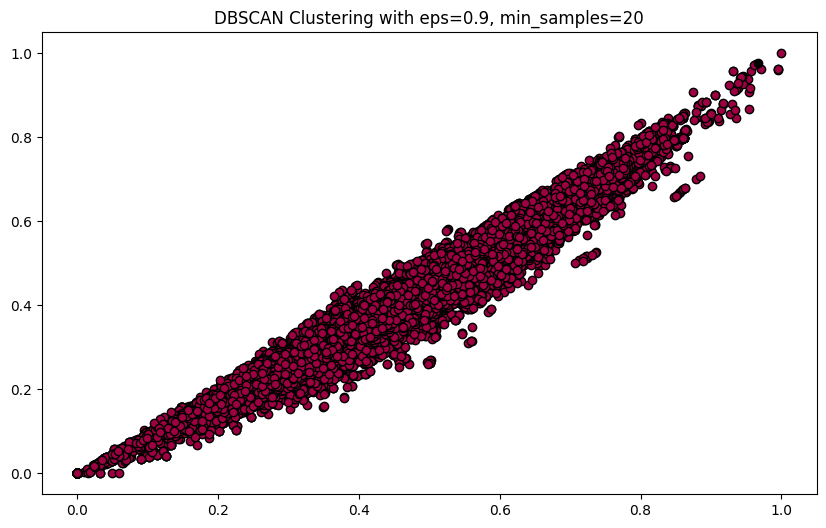

In [ ]:
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(20, 50, 5)

best_params = None
best_score = -1
best_model = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        model_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        model_dbscan.fit(X_scaled)
        labels = model_dbscan.labels_

        if len(set(labels)) <= 1:
            continue

        score = silhouette_score(X_scaled, labels)

        noise_ratio = (labels == -1).sum() / len(labels)
        if noise_ratio < 0.5 and score > best_score:
            best_score = score
            best_params = (eps, min_samples)
            best_model = model_dbscan
            best_labels = labels

print(f"Best parameters: eps = {best_params[0]}, min_samples = {best_params[1]}")
print(f"Best silhouette score: {best_score}")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(best_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (best_labels == k)
    xy = X_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title(f'DBSCAN Clustering with eps={best_params[0]}, min_samples={best_params[1]}')
plt.show()


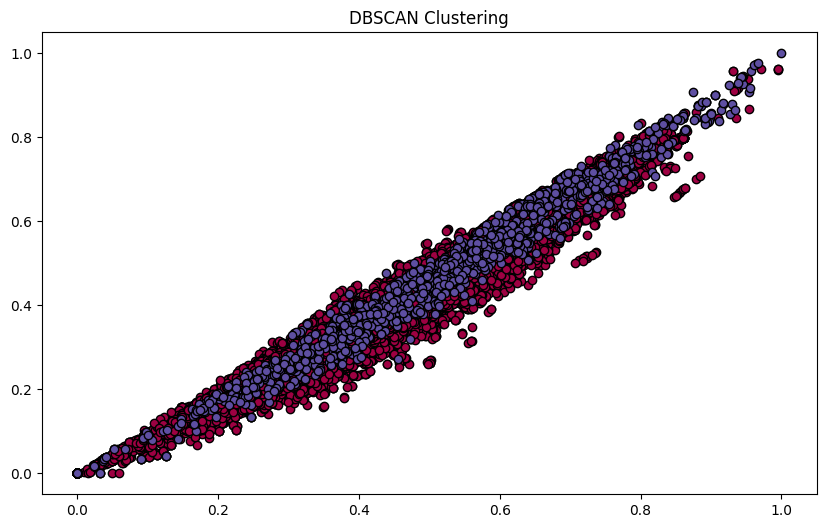

In [ ]:
eps_value = 0.9
min_samples = 20

model_dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
model_dbscan.fit(df_clust_scaled)

labels = model_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('DBSCAN Clustering')
plt.show()

In [ ]:
df_clustering['cluster'] = labels
cluster_summary = df_clustering.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_evening
0,0,23.198916,3.107130,0.011933,0.007977,0.020505,0.000004,0.000455,0.000026,0.000078,0.000321,0.001861,1.078924
1,1,29.605608,13.169915,0.019273,0.012477,0.024897,0.000139,0.001032,0.000492,0.001072,0.001334,0.004953,1.769182


After running DBSCAN, we ended up with only two clusters. However, we wanted to divide the data into a greater number of clusters to achieve more detailed segmentation. Therefore, we continued experimenting with different parameters in an attempt to achieve a more granular clustering solution.

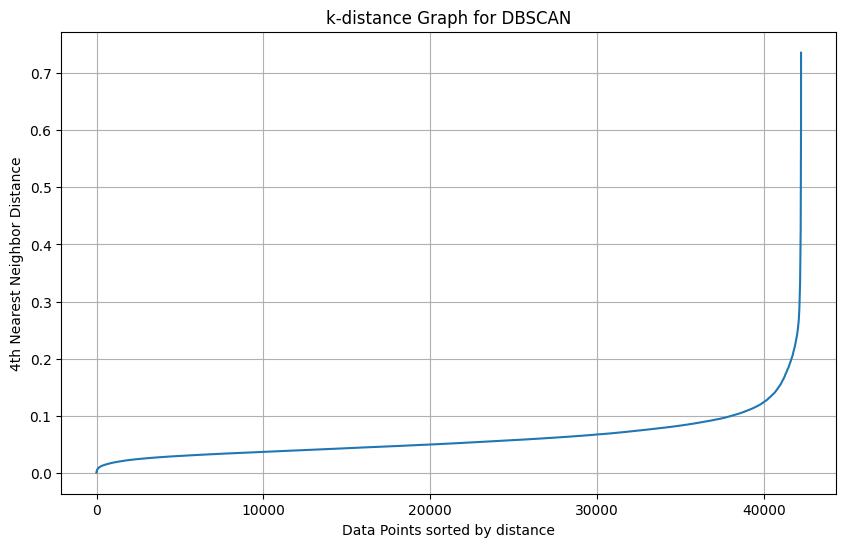

In [ ]:
# determine the optimal value of eps using the k-distance graph

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_clust_scaled)
distances, indices = neighbors_fit.kneighbors(df_clust_scaled)


# sort the distances and plot the k-distance graph

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


We experimented with various epsilon and min_samples parameters in DBSCAN, but ultimately settled on epsilon=0.13 and min_samples=18. This combination resulted in 4 clusters, which we found to be the most suitable for our subsequent modeling purposes. The 4 clusters provided a balanced and meaningful segmentation of the data, aligning well with our analytical goals.

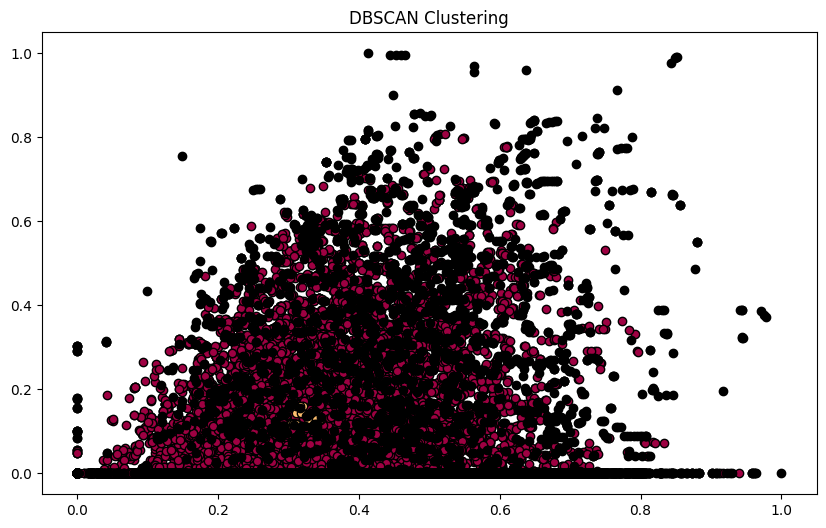

In [ ]:

eps_value = 0.13
min_samples = 18

model_dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
model_dbscan.fit(df_clust_scaled)

labels = model_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = df_clust_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('DBSCAN Clustering')
plt.show()

In [ ]:
df_clustering['cluster'] = labels
cluster_summary = df_clustering.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,-1,28.849185,10.710979,0.018668,0.011995,0.024903,0.000074,0.000946,0.000289,0.000611,0.001122,0.004159,1.761024,1.646095
1,0,22.888747,2.742533,0.011540,0.007762,0.020248,0.000003,0.000429,0.000016,0.000064,0.000277,0.001748,0.990404,1.049111
2,1,20.659331,7.091706,0.011773,0.001894,0.016126,0.000007,0.000153,0.000964,0.000010,0.005956,0.004413,0.366761,1.038468
3,2,26.853497,0.000000,0.037595,0.001811,0.010908,0.000000,0.000059,0.002408,0.000000,0.000013,0.009539,0.846959,2.096700


In [ ]:
cluster_summary.describe().T

,count,mean,std,min,25%,50%,75%,max
cluster,4.0,0.500000,1.290994,-1.000000,-0.250000,0.500000,1.250000,2.000000
window_noise_traffic_night,4.0,24.812690,3.715290,20.659331,22.331393,24.871122,27.352419,28.849185
window_noise_train_night,4.0,5.136304,4.726251,0.000000,2.056900,4.917120,7.996524,10.710979
view_buildings_mean,4.0,0.019894,0.012256,0.011540,0.011715,0.015220,0.023400,0.037595
view_greenery_mean,4.0,0.005865,0.004946,0.001811,0.001873,0.004828,0.008820,0.011995
view_ground_mean,4.0,0.018046,0.005959,0.010908,0.014821,0.018187,0.021412,0.024903
view_highways_mean,4.0,0.000021,0.000035,0.000000,0.000002,0.000005,0.000023,0.000074
view_pedestrians_mean,4.0,0.000397,0.000398,0.000059,0.000130,0.000291,0.000558,0.000946
view_railway_tracks_mean,4.0,0.000919,0.001069,0.000016,0.000221,0.000627,0.001325,0.002408
view_water_mean,4.0,0.000171,0.000294,0.000000,0.000008,0.000037,0.000201,0.000611


To invert the columns that add negative value to the house quality score, we use the following linear regression:

In [ ]:
maximo = cluster_summary['window_noise_traffic_night'].max()
minimo = cluster_summary['window_noise_traffic_night'].min()


# defining the matrix of coefficients A and the vector of constant terms b

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

# resolving

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0000000000000002, b = 49.508515251648994


In [ ]:
cluster_summary['window_noise_traffic_night'] = cluster_summary['window_noise_traffic_night']*a + b

In [ ]:
maximo = cluster_summary['window_noise_train_night'].max()
minimo = cluster_summary['window_noise_train_night'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 10.710978556230403


In [ ]:
cluster_summary['window_noise_train_night'] = cluster_summary['window_noise_train_night']*a + b

In [ ]:
maximo = cluster_summary['view_buildings_mean'].max()
minimo = cluster_summary['view_buildings_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 0.049135055317618


In [ ]:
cluster_summary['view_buildings_mean'] = cluster_summary['view_buildings_mean']*a + b

In [ ]:
maximo = cluster_summary['view_pedestrians_mean'].max()
minimo = cluster_summary['view_pedestrians_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0000000000000002, b = 0.0010054260385634292


In [ ]:
cluster_summary['view_pedestrians_mean'] = cluster_summary['view_pedestrians_mean']*a + b

In [ ]:
maximo = cluster_summary['view_highways_mean'].max()
minimo = cluster_summary['view_highways_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 7.37693446961848e-05


In [ ]:
cluster_summary['view_highways_mean'] = cluster_summary['view_highways_mean']*a + b

In [ ]:
maximo = cluster_summary['view_railway_tracks_mean'].max()
minimo = cluster_summary['view_railway_tracks_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 0.0024236978550009267


In [ ]:
cluster_summary['view_railway_tracks_mean'] = cluster_summary['view_railway_tracks_mean']*a + b

In [ ]:
maximo = cluster_summary['view_street_sum'].max()
minimo = cluster_summary['view_street_sum'].min()


A = np.array([[minimo, 1],
              [maximo, 1]])


b = np.array([maximo, minimo])



soluciones = np.linalg.solve(A, b)


a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 0.011286721885282736


In [ ]:
cluster_summary['view_street_sum'] = cluster_summary['view_street_sum']*a + b

In [ ]:
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,-1,20.659331,0.000000,0.030467,0.011995,0.024903,0.000000,0.000059,0.002135,0.000611,0.001122,0.007128,1.761024,1.646095
1,0,26.619769,7.968445,0.037595,0.007762,0.020248,0.000071,0.000576,0.002408,0.000064,0.000277,0.009539,0.990404,1.049111
2,1,28.849185,3.619273,0.037362,0.001894,0.016126,0.000067,0.000852,0.001459,0.000010,0.005956,0.006874,0.366761,1.038468
3,2,22.655018,10.710979,0.011540,0.001811,0.010908,0.000074,0.000946,0.000016,0.000000,0.000013,0.001748,0.846959,2.096700


In [ ]:
cluster_summary.shape

(4, 14)

In [ ]:
cluster_summary_scaled = cluster_summary.copy()

In [ ]:
cluster_summary_scaled = MinMaxScaler().fit_transform(cluster_summary_scaled)

In [ ]:
df_4clust = pd.DataFrame(cluster_summary_scaled, columns=cluster_summary.columns)

In [ ]:
df_4clust

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,0.000000,0.000000,0.000000,0.726427,1.000000,1.000000,0.000000,0.000000,0.886030,1.000000,0.186671,0.690517,1.000000,0.574191
1,0.333333,0.727783,0.743951,1.000000,0.584388,0.667398,0.965193,0.582810,1.000000,0.104499,0.044417,1.000000,0.447292,0.010058
2,0.666667,1.000000,0.337903,0.991048,0.008171,0.372818,0.910064,0.894445,0.603463,0.016747,1.000000,0.657904,0.000000,0.000000
3,1.000000,0.243678,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.344410,1.000000


In [ ]:
df_4clust.shape

(4, 14)

In [ ]:
df_4clust['score'] = df_4clust['window_noise_traffic_night'] + df_4clust['window_noise_train_night'] + df_4clust['view_buildings_mean'] + df_4clust['view_pedestrians_mean'] + df_4clust['view_highways_mean'] + df_4clust['view_railway_tracks_mean'] + df_4clust['view_street_sum'] + df_4clust['view_greenery_mean'] + df_4clust['view_water_mean'] + df_4clust['view_ground_mean'] + df_4clust['view_mountains_sum'] + df_4clust['mean_evening']

In [ ]:
df_4clust

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening,score
0,0.000000,0.000000,0.000000,0.726427,1.000000,1.000000,0.000000,0.000000,0.886030,1.000000,0.186671,0.690517,1.000000,0.574191,6.063836
1,0.333333,0.727783,0.743951,1.000000,0.584388,0.667398,0.965193,0.582810,1.000000,0.104499,0.044417,1.000000,0.447292,0.010058,7.430496
2,0.666667,1.000000,0.337903,0.991048,0.008171,0.372818,0.910064,0.894445,0.603463,0.016747,1.000000,0.657904,0.000000,0.000000,6.792563
3,1.000000,0.243678,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.344410,1.000000,4.243678


In [ ]:
df_4clust.shape

(4, 15)

Worst to best clusters order: 2, -1, 1, 0

In [ ]:
df_clustering['cluster'].value_counts()

cluster
 0    38393
-1     3766
 1       30
 2       18
Name: count, dtype: int64

Trying to obtain more group for more balanced clusters:

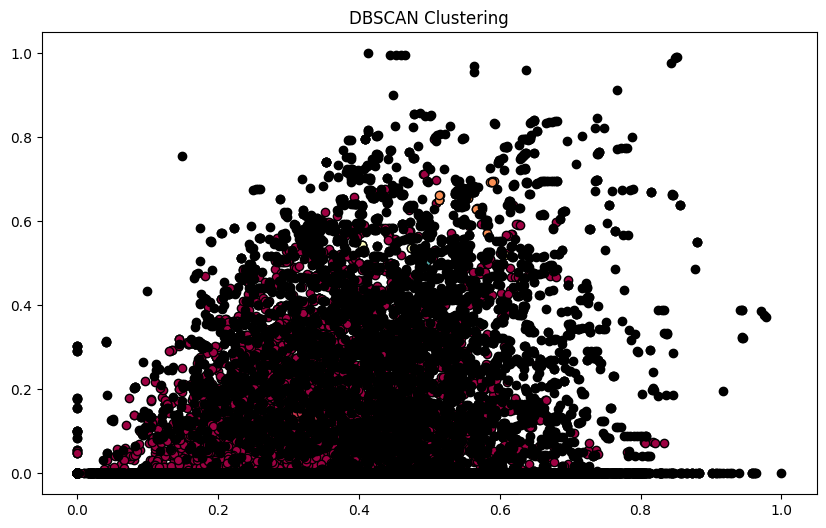

In [ ]:
eps_value = 0.1
min_samples = 15

model_dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
model_dbscan.fit(df_clust_scaled)

labels = model_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = df_clust_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('DBSCAN Clustering')
plt.show()

In [ ]:
df_clustering['cluster'] = labels
cluster_summary = df_clustering.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,-1,27.673154,8.515598,0.017911,0.010996,0.024243,3.547237e-05,7.819538e-04,0.000165,0.000358,0.000835,0.003593,1.606501,1.514111
1,0,22.336104,2.108548,0.010758,0.007432,0.019730,1.486659e-06,3.940535e-04,0.000010,0.000048,0.000227,0.001559,0.921540,0.998406
2,1,20.659331,7.091706,0.011773,0.001894,0.016126,6.634531e-06,1.530377e-04,0.000964,0.000010,0.005956,0.004413,0.366761,1.038468
3,2,0.000000,0.000000,0.025305,0.000837,0.003516,0.000000e+00,5.567366e-07,0.000135,0.000031,0.002944,0.000287,0.652407,0.540728
4,3,35.281852,33.943359,0.003639,0.009604,0.027868,4.034861e-07,2.783182e-04,0.000135,0.000004,0.000195,0.001096,0.723196,1.622133
5,4,6.269170,0.000000,0.006968,0.001214,0.020665,0.000000e+00,3.804346e-03,0.000002,0.000006,0.002540,0.000104,0.820642,1.347230
6,5,38.731395,25.136095,0.004831,0.005727,0.034270,0.000000e+00,2.589654e-04,0.000053,0.000047,0.000109,0.001874,1.522011,0.809495
7,6,26.586789,28.932388,0.013536,0.011717,0.037537,0.000000e+00,4.227043e-05,0.000029,0.000118,0.000195,0.000542,1.535117,0.826813
8,7,29.744167,0.635966,0.024188,0.007609,0.013070,2.634221e-08,8.255056e-05,0.001099,0.000002,0.000010,0.004569,0.844541,0.935242
9,8,40.862854,0.000000,0.010632,0.004627,0.038488,0.000000e+00,1.864408e-03,0.000000,0.002367,0.000191,0.007381,1.670151,1.538184


In [ ]:
df_clustering['cluster'].value_counts()

cluster
 0     33517
-1      8438
 4        42
 3        32
 1        30
 6        29
 5        26
 8        20
 7        17
 2        16
 10       15
 11       15
 9        10
Name: count, dtype: int64

Best parameters: eps = 0.1, min_samples = 5
Number of clusters: 126


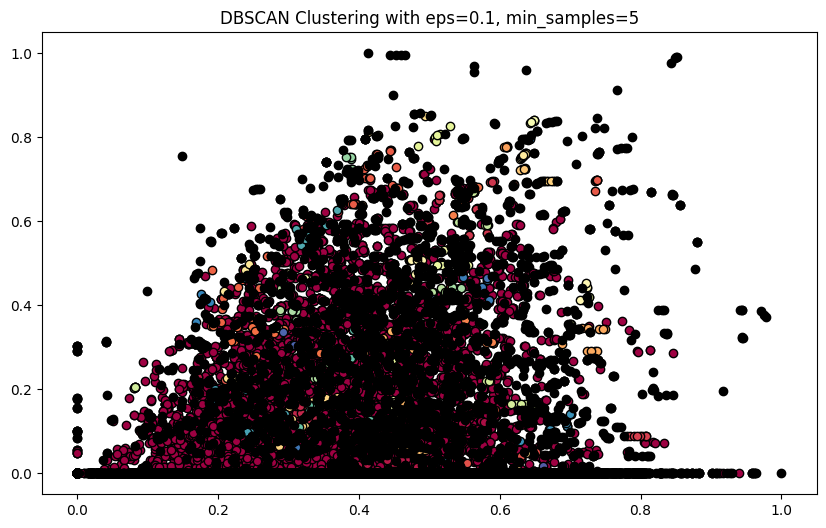

In [ ]:
# define the ranges for eps and min_samples
eps_values = np.linspace(0.1, 0.5, 10)
min_samples_values = range(5, 20, 2)

best_params = None
best_num_clusters = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        model_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        model_dbscan.fit(df_clust_scaled)
        labels = model_dbscan.labels_

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if num_clusters >= 10:
            best_params = (eps, min_samples)
            best_num_clusters = num_clusters
            break
    if best_num_clusters >= 10:
        break

print(f"Best parameters: eps = {best_params[0]}, min_samples = {best_params[1]}")
print(f"Number of clusters: {best_num_clusters}")

model_dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
model_dbscan.fit(df_clust_scaled)
labels = model_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = df_clust_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title(f'DBSCAN Clustering with eps={best_params[0]}, min_samples={best_params[1]}')
plt.show()


In [ ]:
df_clustering['cluster'] = labels
cluster_summary = df_clustering.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

In [ ]:
df_clustering['cluster'].value_counts()

cluster
 0      36485
-1       4655
 11        37
 21        35
 8         30
        ...  
 124        4
 125        4
 113        4
 123        4
 52         3
Name: count, Length: 127, dtype: int64

Trying to make clusters from the big group:

In [ ]:
df_clustering.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening,cluster
0,00024dcb907dc1671ef48af550271427,17.786085,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.000000,0.000000,5.309107e-04,0.985548,0.896031,4
1,00048208e97e07b7b183718826929def,17.790932,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.000493,0.000071,1.419091e-03,0.770462,1.063340,4
2,00048321bf465caba119f73d57093299,28.146663,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.000000,0.000506,8.415804e-03,0.914291,2.432358,4
3,00075003b82a8cf375c274560aa6bc9c,19.688055,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.000000,0.000000,1.808636e-04,0.702243,1.273586,4
4,000916099693de3f997973f552fdff07,15.213498,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.000000,0.000000,9.432771e-07,0.779696,0.274397,4


In [ ]:
df_clustering['cluster'].value_counts()

cluster
4    38393
2     3766
3       30
1       18
Name: count, dtype: int64

In [ ]:
df = df_clustering[df_clustering['cluster'] == 4]

In [ ]:
df['cluster'].value_counts()

In [ ]:
X = df.drop(columns=['apartment_id', 'cluster']).to_numpy()

df_clust_scaled = MinMaxScaler().fit_transform(X)

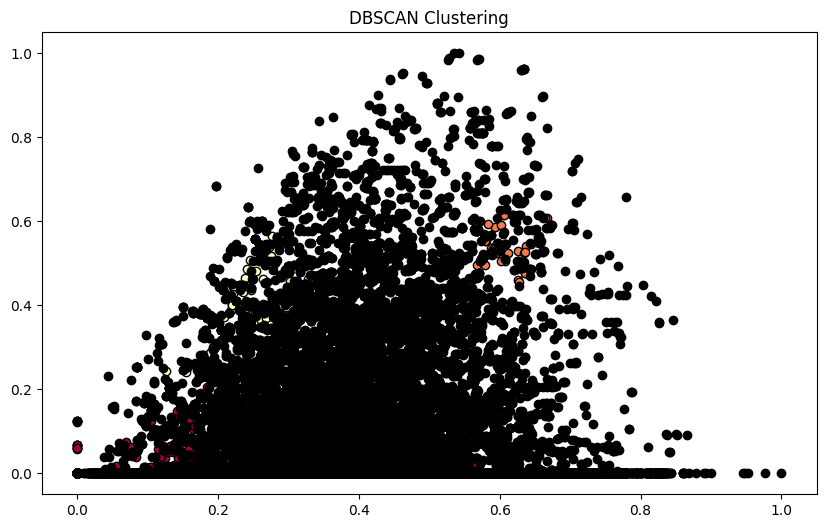

In [ ]:
eps_value = 0.1
min_samples = 18

model_dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
model_dbscan.fit(df_clust_scaled)

labels = model_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = df_clust_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('DBSCAN Clustering')
plt.show()

In [ ]:
df['cluster'] = labels
cluster_summary = df.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

<ipython-input-35-db594be89ee8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,-1,23.640936,3.416258,0.012841,0.008605,0.021677,3.216782e-06,0.000502,2.045562e-05,7.945763e-05,0.000324,0.002054,1.128268,1.164524
1,0,20.308238,0.213988,0.007240,0.005006,0.015757,2.768629e-07,0.000181,1.045550e-06,1.341619e-05,0.000100,0.000733,0.527011,0.671441
2,1,41.124009,0.000000,0.007036,0.003728,0.008388,0.000000e+00,0.000581,0.000000e+00,8.956523e-06,0.000016,0.002608,1.044928,0.197046
3,2,17.921972,0.000000,0.004346,0.018148,0.020521,0.000000e+00,0.000606,9.350494e-06,1.182001e-07,0.000028,0.000272,1.196560,1.839905
4,3,26.029193,7.854292,0.006755,0.004949,0.015986,2.017183e-07,0.000012,9.554255e-08,9.443190e-07,0.000004,0.001834,0.706672,0.416722
5,4,36.942449,23.077690,0.003394,0.002864,0.008295,0.000000e+00,0.000065,2.657572e-05,9.709618e-08,0.000010,0.001779,0.224517,0.190574
6,5,32.759451,7.703527,0.010800,0.012592,0.028244,4.483057e-05,0.000107,9.893995e-08,9.963977e-06,0.001494,0.002062,1.850892,1.871715
7,6,6.269783,0.000000,0.006606,0.001180,0.021478,0.000000e+00,0.003773,2.017520e-06,7.320116e-06,0.002511,0.000090,0.647000,1.115870
8,7,3.910090,0.000000,0.023438,0.001774,0.012534,4.168791e-07,0.000021,3.683061e-07,3.514680e-07,0.000039,0.000060,0.995582,0.515381
9,8,19.647993,17.852855,0.022723,0.002378,0.005697,0.000000e+00,0.000176,3.808525e-05,5.718965e-07,0.000025,0.000692,0.707998,0.665846


In [ ]:
df_clustering['cluster'].value_counts()

cluster
 0      36485
-1       4655
 11        37
 21        35
 8         30
        ...  
 124        4
 125        4
 113        4
 123        4
 52         3
Name: count, Length: 127, dtype: int64

We can see the problem persists.

#### K-Means

Elbow method for selecting number of clusters.

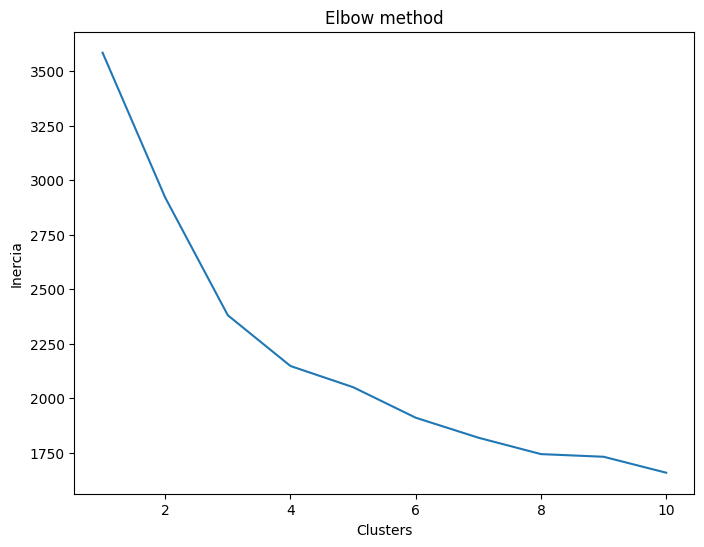

In [43]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X=df_clust_scaled)
    clusters.append(km.inertia_)


fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inercia')


ax.annotate('Posible candidato', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Posible candidato', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

From this, we decided to try with 3 and 8 clusters.

In [44]:
# model 1: 3 clusters

model_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
model_kmeans.fit(X=df_clust_scaled)

KMeans(n_clusters=3, n_init=25, random_state=123)

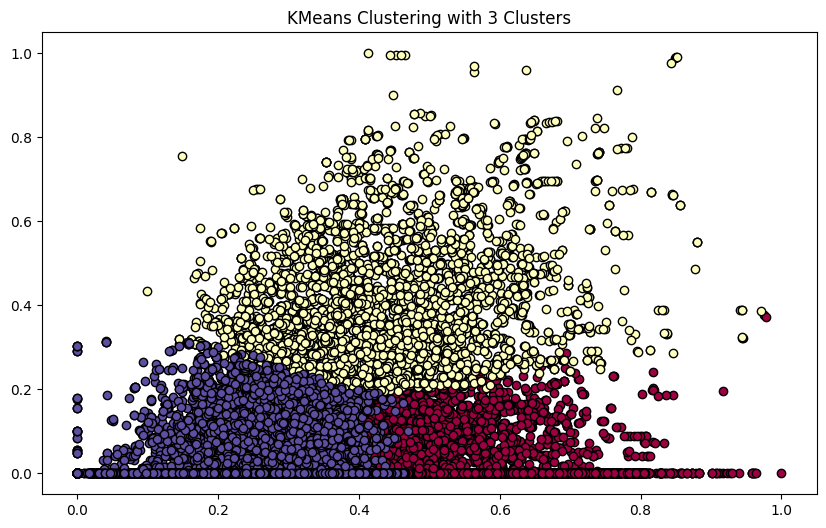

In [46]:

labels = model_kmeans.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = df_clust_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering with 3 Clusters')
plt.show()

In [47]:
df_clustering['cluster'] = labels
cluster_summary = df_clustering.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,0,30.641333,1.067762,0.014814,0.009127,0.022992,0.000015,0.000469,0.000045,0.000128,0.000413,0.003104,1.297871,1.305499
1,1,27.498845,20.862269,0.010611,0.008259,0.022637,0.000018,0.000455,0.000142,0.000196,0.000404,0.002173,1.124735,1.099070
2,2,16.574492,1.193111,0.010435,0.007296,0.018283,0.000001,0.000485,0.000016,0.000080,0.000298,0.000997,0.848512,0.939176


In [41]:
# model 2: 8 clusters

model_kmeans = KMeans(n_clusters=8, n_init=25, random_state=123)
model_kmeans.fit(X=df_clust_scaled)

KMeans(n_init=25, random_state=123)

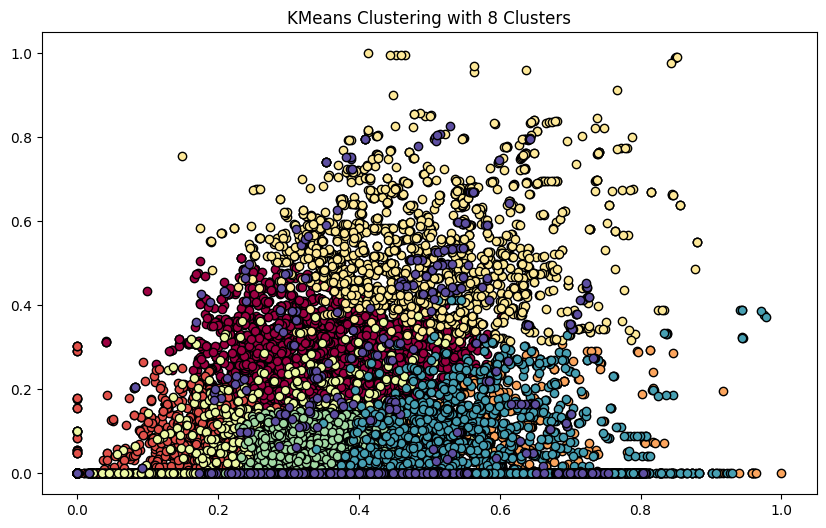

In [42]:
labels = model_kmeans.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = df_clust_scaled[class_member_mask]

    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering with 8 Clusters')
plt.show()

In [43]:
df_clustering['cluster'] = labels
cluster_summary = df_clustering.drop('apartment_id', axis=1).groupby('cluster').mean().reset_index()
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,0,23.138579,14.330746,0.010381,0.007672,0.020276,0.000003,0.000462,0.000048,0.000171,0.000345,0.001584,0.917227,0.985276
1,1,10.906661,0.855053,0.010241,0.005825,0.014780,0.000001,0.000379,0.000008,0.000081,0.000230,0.000636,0.655662,0.715109
2,2,35.017800,1.026660,0.011115,0.007524,0.020210,0.000016,0.000372,0.000030,0.000091,0.000174,0.001859,0.707842,0.751599
3,3,31.301707,27.877051,0.010686,0.008595,0.024184,0.000035,0.000429,0.000253,0.000214,0.000417,0.002640,1.276045,1.163720
4,4,20.467152,0.939064,0.014963,0.009648,0.020980,0.000006,0.000676,0.000025,0.000151,0.000768,0.001557,2.060334,1.924429
5,5,22.261815,0.664681,0.010400,0.008411,0.022080,0.000002,0.000509,0.000014,0.000074,0.000284,0.001485,0.849562,0.976312
6,6,33.812083,1.527662,0.020906,0.010297,0.024553,0.000027,0.000388,0.000097,0.000154,0.000462,0.006252,1.626647,1.670030
7,7,27.386469,11.544639,0.016261,0.008465,0.025868,0.000062,0.001020,0.000320,0.000280,0.000799,0.003458,1.456777,1.289409


In [44]:
df_clustering['cluster'].value_counts()

cluster
5    13651
1     7361
2     5396
4     5188
6     4353
0     3914
3     1853
7      491
Name: count, dtype: int64

We decided to use 8 clusters as it provides a more detailed segmentation of the data, which aligns well with our analytical goals. The 8 clusters are more balanced and provide a more nuanced view of the data, allowing for more granular insights and targeted strategies.

To invert the columns that add negative value to the house quality score, we use the following linear regression:

In [45]:
maximo = cluster_summary['window_noise_traffic_night'].max()
minimo = cluster_summary['window_noise_traffic_night'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 45.92446077635205


In [46]:
cluster_summary['window_noise_traffic_night'] = cluster_summary['window_noise_traffic_night']*a + b

In [47]:
maximo = cluster_summary['window_noise_train_night'].max()
minimo = cluster_summary['window_noise_train_night'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 28.541731794967042


In [48]:
cluster_summary['window_noise_train_night'] = cluster_summary['window_noise_train_night']*a + b

In [49]:
maximo = cluster_summary['view_buildings_mean'].max()
minimo = cluster_summary['view_buildings_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0000000000000002, b = 0.0311464181012945


In [50]:
cluster_summary['view_buildings_mean'] = cluster_summary['view_buildings_mean']*a + b

In [51]:
maximo = cluster_summary['view_pedestrians_mean'].max()
minimo = cluster_summary['view_pedestrians_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 0.001391038756507968


In [52]:
cluster_summary['view_pedestrians_mean'] = cluster_summary['view_pedestrians_mean']*a + b

In [53]:
maximo = cluster_summary['view_highways_mean'].max()
minimo = cluster_summary['view_highways_mean'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])

soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 6.33563958502444e-05


In [54]:
cluster_summary['view_highways_mean'] = cluster_summary['view_highways_mean']*a + b

In [55]:
maximo = cluster_summary['view_railway_tracks_mean'].max()
minimo = cluster_summary['view_railway_tracks_mean'].min()



A = np.array([[minimo, 1],
              [maximo, 1]])

b = np.array([maximo, minimo])



soluciones = np.linalg.solve(A, b)

a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -1.0, b = 0.0003279035311393545


In [56]:
cluster_summary['view_railway_tracks_mean'] = cluster_summary['view_railway_tracks_mean']*a + b

In [57]:
maximo = cluster_summary['view_street_sum'].max()
minimo = cluster_summary['view_street_sum'].min()

A = np.array([[minimo, 1],
              [maximo, 1]])


b = np.array([maximo, minimo])


soluciones = np.linalg.solve(A, b)


a = soluciones[0]
b = soluciones[1]

print(f'Solutions: a = {a}, b = {b}')

Las soluciones son a = -0.9999999999999999, b = 0.006888193801704736


In [58]:
cluster_summary['view_street_sum'] = cluster_summary['view_street_sum']*a + b

In [59]:
cluster_summary

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening
0,0,22.785882,14.210986,0.020766,0.007672,0.020276,0.000061,0.000929,0.000279,0.000171,0.000345,0.005304,0.917227,0.985276
1,1,35.017800,27.686678,0.020906,0.005825,0.014780,0.000062,0.001012,0.000320,0.000081,0.000230,0.006252,0.655662,0.715109
2,2,10.906661,27.515072,0.020032,0.007524,0.020210,0.000047,0.001020,0.000298,0.000091,0.000174,0.005029,0.707842,0.751599
3,3,14.622753,0.664681,0.020460,0.008595,0.024184,0.000028,0.000962,0.000075,0.000214,0.000417,0.004248,1.276045,1.163720
4,4,25.457309,27.602668,0.016183,0.009648,0.020980,0.000058,0.000715,0.000303,0.000151,0.000768,0.005332,2.060334,1.924429
5,5,23.662646,27.877051,0.020747,0.008411,0.022080,0.000062,0.000882,0.000314,0.000074,0.000284,0.005403,0.849562,0.976312
6,6,12.112378,27.014070,0.010241,0.010297,0.024553,0.000036,0.001003,0.000231,0.000154,0.000462,0.000636,1.626647,1.670030
7,7,18.537991,16.997093,0.014885,0.008465,0.025868,0.000001,0.000372,0.000008,0.000280,0.000799,0.003430,1.456777,1.289409


In [60]:
cluster_summary_scaled = cluster_summary.copy()

In [61]:
cluster_summary_scaled = MinMaxScaler().fit_transform(cluster_summary_scaled)

In [62]:
df_4clust = pd.DataFrame(cluster_summary_scaled, columns=cluster_summary.columns)

In [65]:
df_4clust.shape

(8, 15)

Creating a score column to determine the house quality score by summing the values of the columns and decide the order of the clusters.

In [66]:
df_4clust['score'] = df_4clust['window_noise_traffic_night'] + df_4clust['window_noise_train_night'] + df_4clust['view_buildings_mean'] + df_4clust['view_pedestrians_mean'] + df_4clust['view_highways_mean'] + df_4clust['view_railway_tracks_mean'] + df_4clust['view_street_sum'] + df_4clust['view_greenery_mean'] + df_4clust['view_water_mean'] + df_4clust['view_ground_mean'] + df_4clust['view_mountains_sum'] + df_4clust['mean_morning'] + df_4clust['mean_evening']

In [67]:
df_4clust

,cluster,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening,score
0,0.000000,0.492686,0.497800,0.986861,0.413042,0.495638,0.976985,0.859820,0.869332,0.473387,0.272318,0.831161,0.186210,0.223404,7.578644
1,0.142857,1.000000,0.993004,1.000000,0.000000,0.000000,1.000000,0.987925,1.000000,0.033296,0.089147,1.000000,0.000000,0.000000,7.103372
2,0.285714,0.000000,0.986698,0.918066,0.379959,0.489702,0.751553,1.000000,0.929091,0.086032,0.000000,0.782190,0.037147,0.030174,6.390612
3,0.428571,0.154123,0.000000,0.958241,0.619426,0.848109,0.440439,0.911395,0.214812,0.678747,0.387539,0.643164,0.441656,0.370961,6.668612
4,0.571429,0.603482,0.989917,0.557189,0.854997,0.559124,0.929991,0.529598,0.944166,0.376397,0.950175,0.836067,1.000000,1.000000,10.131102
5,0.714286,0.529049,1.000000,0.985088,0.578212,0.658356,0.990822,0.787443,0.978870,0.000000,0.175861,0.848718,0.138039,0.215992,7.886451
6,0.857143,0.050007,0.968287,0.000000,1.000000,0.881463,0.572767,0.974998,0.713002,0.390204,0.461015,0.000000,0.691254,0.789635,7.492630
7,1.000000,0.316506,0.600183,0.435483,0.590481,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.497542,0.570322,0.474895,6.485413


In [68]:
df_4clust['score'].sort_values(ascending=False)

4    10.131102
5     7.886451
0     7.578644
6     7.492630
1     7.103372
3     6.668612
7     6.485413
2     6.390612
Name: score, dtype: float64

Mapping the clusters to the order of the house quality score.

In [69]:
df_clustering['cluster'] = df_clustering['cluster'].map({2: 1, 7: 2, 3: 3, 1: 4, 6: 5, 0: 6, 5: 7, 4: 8})
df_clustering.head()

,apartment_id,window_noise_traffic_night,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_evening,cluster
0,00024dcb907dc1671ef48af550271427,17.786085,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.000000,0.000000,5.309107e-04,0.985548,0.896031,7
1,00048208e97e07b7b183718826929def,17.790932,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.000493,0.000071,1.419091e-03,0.770462,1.063340,7
2,00048321bf465caba119f73d57093299,28.146663,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.000000,0.000506,8.415804e-03,0.914291,2.432358,5
3,00075003b82a8cf375c274560aa6bc9c,19.688055,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.000000,0.000000,1.808636e-04,0.702243,1.273586,7
4,000916099693de3f997973f552fdff07,15.213498,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.000000,0.000000,9.432771e-07,0.779696,0.274397,4


In [70]:
df_clustering['cluster'].value_counts()

cluster
7    13651
4     7361
1     5396
8     5188
5     4353
6     3914
3     1853
2      491
Name: count, dtype: int64